## **Simple Linear Regression**

Linear regression performs the task to predict a dependent variable value (y) based on a given independent variable (x). So, this regression technique finds out a linear relationship between x (input) and y(output). Hence, the name is Linear Regression (https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f)

In [1]:
#import package as usual
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [2]:
#load file and see the head
df = pd.read_csv('kurs-inflation.csv')
df.head(10)

,inflation,kurs
0,0.0416,9175
1,0.0505,9060
2,0.0622,8940
3,0.0644,9035
4,0.0580,8925
5,0.0567,8938
6,0.0633,9034
7,0.0696,9010
8,0.0702,9048
9,0.0684,8822


## **Exploratory Data Analysis**

In [5]:
#check data type each column
df.dtypes

inflation    float64
kurs           int64
dtype: object

In [6]:
#check data descriptions
df.describe()

,inflation,kurs
count,80.000000,80.000000
mean,0.055264,11007.562500
std,0.016120,1916.332176
min,0.027900,8500.000000
25%,0.043175,9099.500000
50%,0.053900,11096.500000
75%,0.068325,13048.750000
max,0.087900,14650.000000


In [8]:
#check null or missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 2 columns):
inflation    80 non-null float64
kurs         80 non-null int64
dtypes: float64(1), int64(1)
memory usage: 1.3 KB


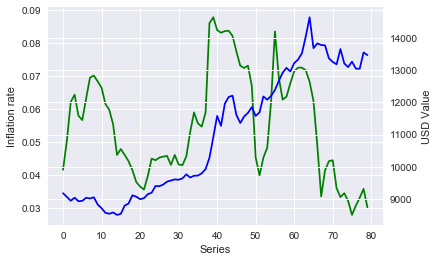

In [10]:
#plot both data into one figure

fig, graph = plt.subplots()
graph.plot(df['inflation'], color='green')
graph.set_xlabel('Series')
graph.set_ylabel('Inflation rate')

graph2 = graph.twinx()
graph2.plot(df['kurs'], color='blue')
graph2.set_ylabel('USD Value')

plt.show()

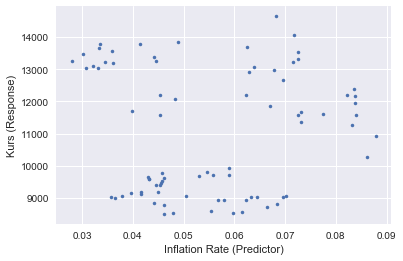

In [11]:
#Scatter plot check to know hypothesis

plt.plot(df['inflation'], df['kurs'], marker='.', linestyle='none')
plt.xlabel('Inflation Rate (Predictor)')
plt.ylabel('Kurs (Response)')
plt.show()

C:\Users\HP\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


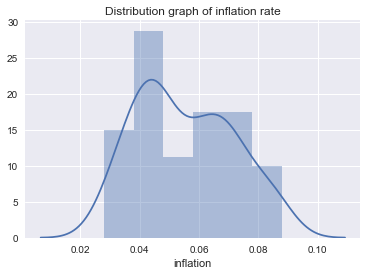

In [12]:
#plotting graph distribution inflation
sns.distplot(df['inflation'], kde=True, rug=False)
plt.title('Distribution graph of inflation rate')
plt.show()

C:\Users\HP\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


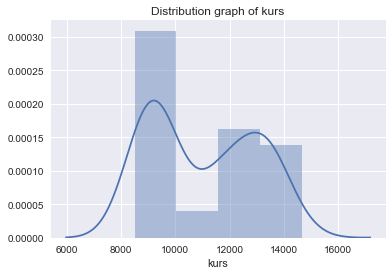

In [13]:
#plotting graph distribution inflation
sns.distplot(df['kurs'], kde=True, rug=False)
plt.title('Distribution graph of kurs')
plt.show()

From the data above, using scatter plot, we have a hypothesis that actually there is no correlation between inflation rate and kurs. So, high possibility that the error rate in linear regression is too high as well and can not be represented on linear regression model.

## **Linear Regression**

In [25]:
#Split the data into two parts (training and testing). it can be used to know the accuracy of model. Put 80% training and 20% testing separation
X = df['inflation'].values.reshape(-1,1)
y = df['kurs'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [26]:
#check the separation
print('X train length : ', len(X_train))
print('Y train length : ', len(y_train))
print('X test length : ', len(X_test))
print('Y test length : ', len(y_test))

X train length :  64
Y train length :  64
X test length :  16
Y test length :  16


In [27]:
#Creating a model using training dataset
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
#Show the slope using function
print('Slope : ', regressor.coef_)

#Show the intercept
print('Intercept : ', regressor.intercept_)

Slope :  [[14240.89713074]]
Intercept :  [9973.8708602]


Meaning, in every point of changing inflation rate, it will change almost 14240% in kurs.

In [29]:
#Comparing y prediction with y actual and see the accuration
y_prediction = regressor.predict(X_test)
comparison = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_prediction.flatten()})
comparison

,Actual,Predicted
0,11578,10618.983500
1,9535,10626.103949
2,9594,10589.077616
3,13048,10445.244555
4,11609,11077.540388
5,13185,10486.543157
6,13835,10670.250730
7,13775,10563.444001
8,11675,11016.304530
9,13372,10603.318513


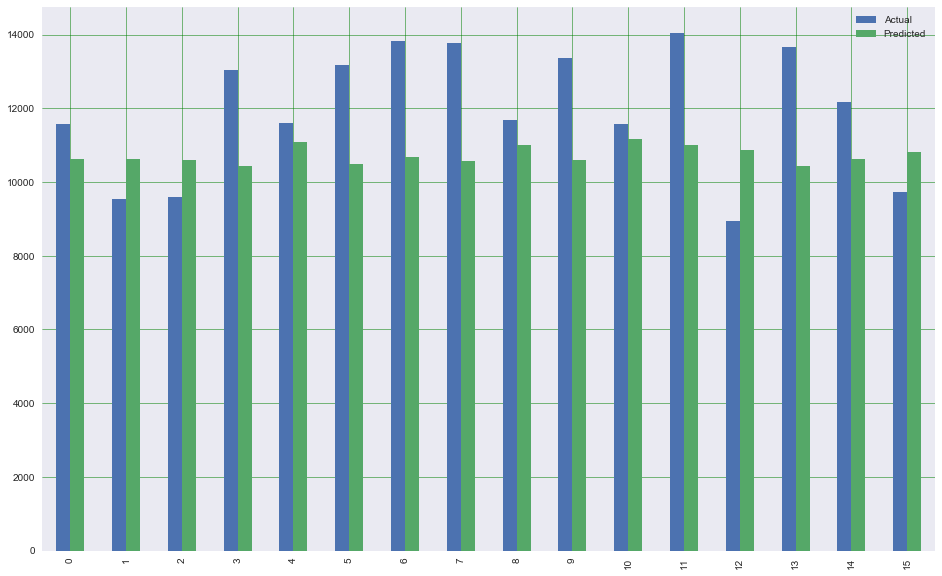

In [30]:
#Plotting the comparison

comparison.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

See the actual and prediction is quite far in terms of value. And we have a hypothesis that the error is too high

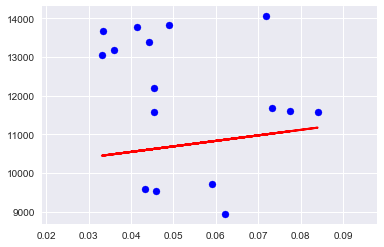

In [32]:
#Plot the scatter of test data

plt.scatter(X_test, y_test,  color='blue')
plt.plot(X_test, y_prediction, color='red', linewidth=2)
plt.show()

the function is not match with the actual testing

## **Evaluation Metrics**

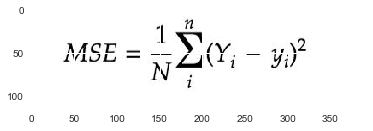

In [41]:
import matplotlib.image as mpimg
image1 = mpimg.imread("MSE.jpg")
plt.imshow(image1)
plt.show()

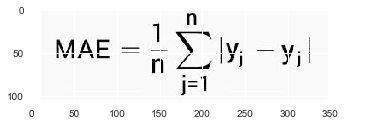

In [42]:
image2 = mpimg.imread("MAE.jpg")
plt.imshow(image2)
plt.show()

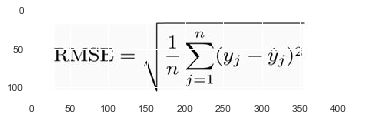

In [43]:
image3 = mpimg.imread("RMSE.jpg")
plt.imshow(image3)
plt.show()

In [38]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_prediction))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_prediction))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_prediction)))

Mean Absolute Error: 1871.1713071475187
Mean Squared Error: 4563498.541082475
Root Mean Squared Error: 2136.234664329384


From the formula above, the error still height and we can conclude that the linear regression is not fit with the data and we should try another 